<a href="https://colab.research.google.com/github/Naseem-Ananzeh/Ml2_Final_Project/blob/main/Mall_dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Libraries**



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#**Loading The Data**

In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "Mall_Customers.csv"

Mall_c = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "vjchoudhary7/customer-segmentation-tutorial-in-python",
  file_path)

<ipython-input-3-3ce592fc84cd>:6: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  Mall_c = kagglehub.load_dataset(


In [ ]:
Mall_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
Mall_c.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
Mall_c=Mall_c.drop(['CustomerID'],axis=1)

In [ ]:
Mall_c['Gender'] = Mall_c['Gender'].map({'Male': 0, 'Female': 1})

In [ ]:
x_m = Mall_c[['Annual Income (k$)', 'Spending Score (1-100)']]

In [ ]:
scaler = StandardScaler()
x_scaled_m = scaler.fit_transform(x_m)

In [ ]:
pca = PCA()
x_pca_m = pca.fit_transform(x_scaled_m)

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

n_components = np.argmax(cumulative_variance_ratio >= 0.90) + 1

print(f"the minimum number of components preserving 90–95% variance: {n_components}")

pca_reduced = PCA(n_components=n_components)
x_pca_reduced = pca.fit_transform(x_scaled_m)

the minimum number of components preserving 90–95% variance: 2


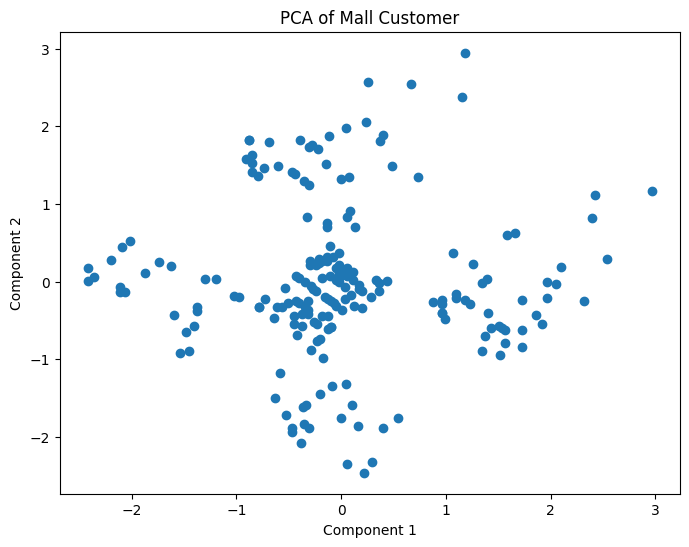

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(x_pca_m[:, 0], x_pca_m[:, 1])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA of Mall Customer')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
Mall_c['cluster'] = kmeans.fit_predict(x_pca_reduced)
#t-SNE before clustering
tsne = TSNE(n_components=2, random_state=42)
x_tsne_before = tsne.fit_transform(x_scaled_m)

#t-SNE after clustering
x_tsne_after = tsne.fit_transform(x_pca_reduced)

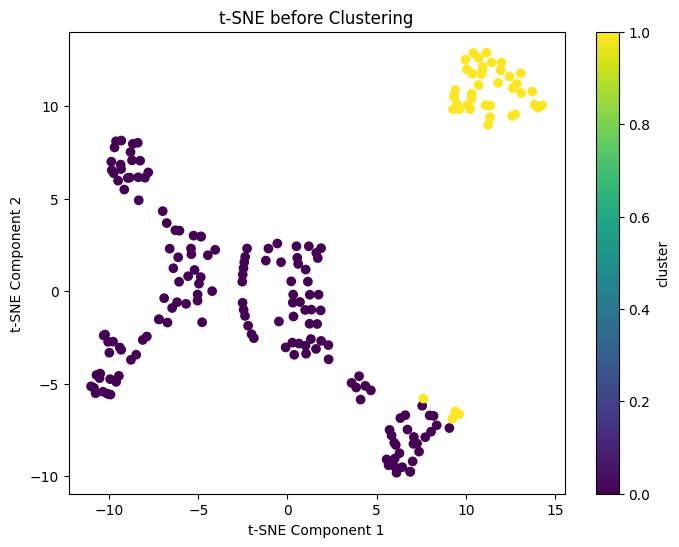

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(x_tsne_before[:, 0], x_tsne_before[:, 1], c=Mall_c['cluster'])
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE before Clustering')
plt.colorbar(label='cluster')
plt.show()

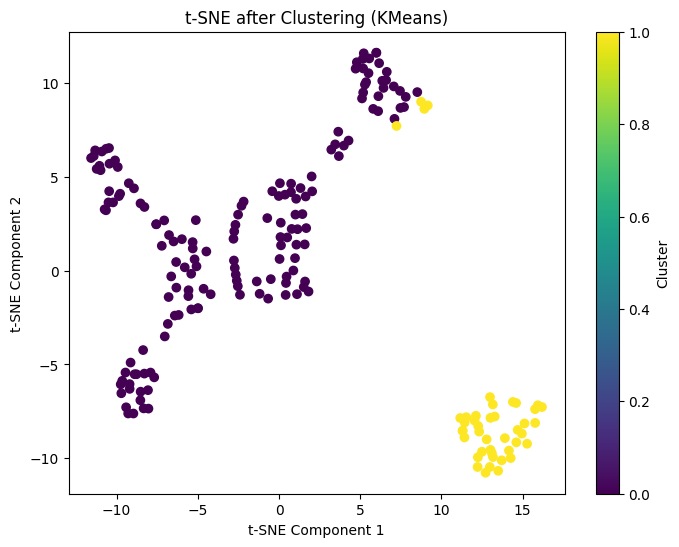

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(x_tsne_after[:, 0], x_tsne_after[:, 1], c=Mall_c['cluster'])
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE after Clustering (KMeans)')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=5,n_init=10,random_state=42)
y_pred=kmeans.fit_predict(x_pca_reduced)
y_pred

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

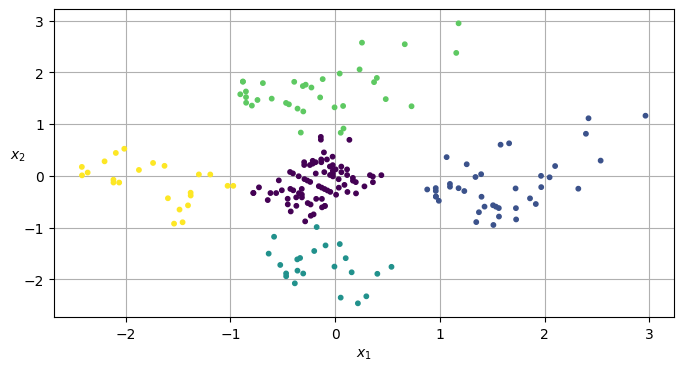

In [ ]:
def plot_clusters(x_pca_reduced, y=y_pred):
    plt.scatter(x_pca_reduced[:, 0], x_pca_reduced[:, 1], c=y, s=10)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(x_pca_reduced)
plt.gca().set_axisbelow(True)
plt.grid()
#save_fig("blobs_plot")
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(x_pca_reduced)


DBSCAN()

In [ ]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,
        0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,
        1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,
        0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,
        1,  0,  1,  0, -1, -1,  1, -1, -1, -1, -1, -1, -1])

In [ ]:
dbscan.components_

array([[-1.53710920e+00, -9.22207047e-01],
       [-3.84167666e-01, -2.07514858e+00],
       [-2.41600197e+00,  1.06654468e-02],
       [-4.66981759e-01, -1.93835476e+00],
       [-1.45567848e+00, -8.95678311e-01],
       [-4.67442886e-01, -1.88391391e+00],
       [-2.36202224e+00,  6.46451712e-02],
       [-2.41738535e+00,  1.73988000e-01],
       [-5.23267116e-01, -1.72013023e+00],
       [-2.11542447e+00, -1.27972877e-01],
       [-2.06098362e+00, -1.28434004e-01],
       [-3.59022310e-01, -1.83039531e+00],
       [-2.11588560e+00, -7.35320262e-02],
       [-3.04120332e-01, -1.88529729e+00],
       [-1.48497398e+00, -6.50463918e-01],
       [-6.33993325e-01, -1.50144457e+00],
       [-1.59570019e+00, -4.31778261e-01],
       [ 2.98418042e-01, -2.32589649e+00],
       [-1.40400439e+00, -5.69494332e-01],
       [-3.60866817e-01, -1.61263191e+00],
       [-2.20054420e+00,  2.81025195e-01],
       [-3.33876954e-01, -1.58564205e+00],
       [-1.87251571e+00,  1.14935883e-01],
       [-5.

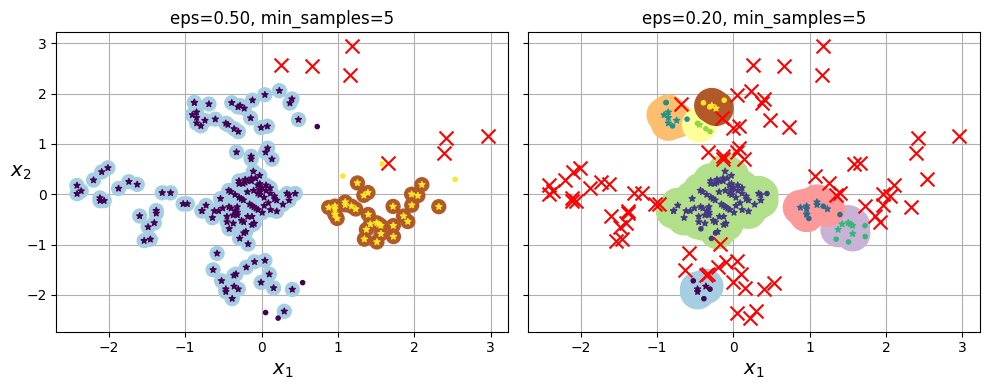

'\nplt.figure(figsize=(9, 3.2))\n\nplt.subplot(121)\nplot_dbscan(dbscan, x_pca_reduced, size=100)\n\nplt.subplot(122)\nplot_dbscan(dbscan2, x_pca_reduced, size=600, show_ylabels=False)\n\nplt.savefig("dbscan_plot")\nplt.show()'

In [ ]:
def plot_dbscan(dbscan, x_pca_reduced, size, show_xlabels=True, show_ylabels=True):

    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = x_pca_reduced[anomalies_mask]
    non_cores = x_pca_reduced[non_core_mask]
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title(f"eps={dbscan.eps:.2f}, min_samples={dbscan.min_samples}")
    plt.grid()
    plt.gca().set_axisbelow(True)

dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(x_pca_reduced)
fig,ax=plt.subplots(1,2,figsize=(10,4))
plt.sca(ax[0])
plot_dbscan(dbscan, x_pca_reduced, size=100)
plt.sca(ax[1])
plot_dbscan(dbscan2, x_pca_reduced, size=600, show_ylabels=False)
plt.tight_layout()
plt.show()
'''
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, x_pca_reduced, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, x_pca_reduced, size=600, show_ylabels=False)

plt.savefig("dbscan_plot")
plt.show()'''

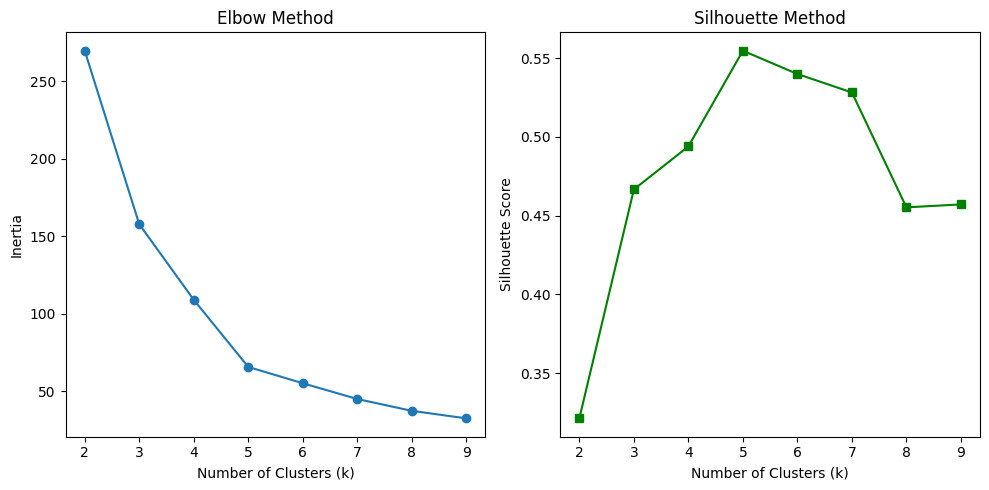

In [ ]:
from sklearn.metrics import silhouette_score
inertias=[]
silhouette_scores=[]
k_range=range(2,10)
for k in k_range:
  kmeans=KMeans(n_clusters=k,n_init=10,random_state=42)
  kmeans.fit(x_pca_reduced)
  inertias.append(kmeans.inertia_)
  silhouette_scores.append(silhouette_score(x_pca_reduced,kmeans.labels_))
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.plot(k_range,inertias,marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')


plt.subplot(1,2,2)
plt.plot(k_range,silhouette_scores,marker='s',color='green')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')

plt.tight_layout()
plt.show()


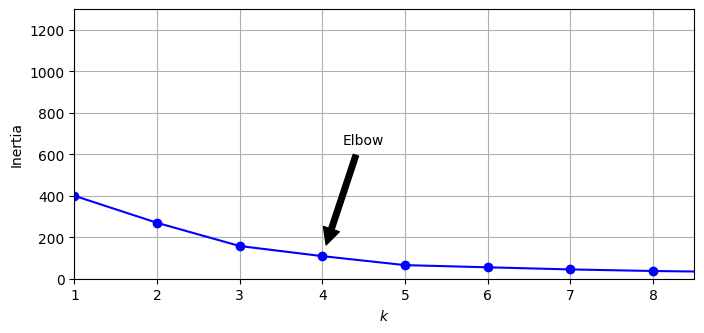

In [ ]:

kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(x_pca_reduced)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.annotate("", xy=(4, inertias[3]), xytext=(4.45, 650),
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.text(4.5, 650, "Elbow", horizontalalignment="center")
plt.axis([1, 8.5, 0, 1300])
plt.grid()
plt.show()

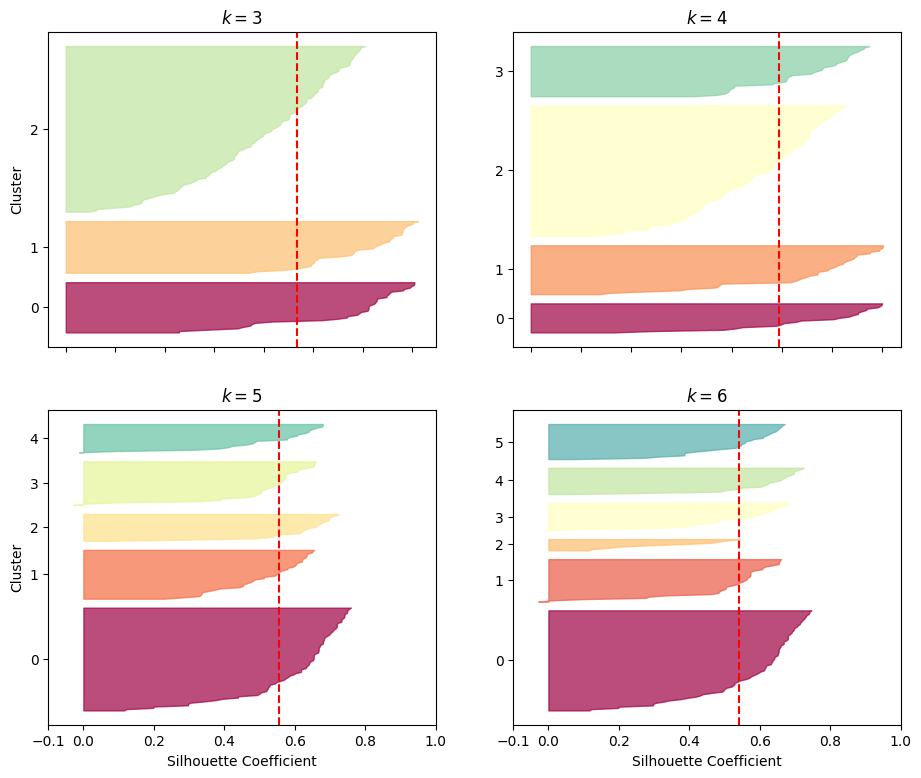

In [ ]:

from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(x_pca_reduced, y_pred)

    padding = len(x_pca_reduced) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title(f"$k={k}$")

plt.show()

KMEANS++

Standarad k-means (random init):
Inertia: 65.5684081557168
Silhouette Score: 0.5546571631100179
K-means++:
Inertia: 65.57885579985046
Silhouette Score: 0.5539423799423155


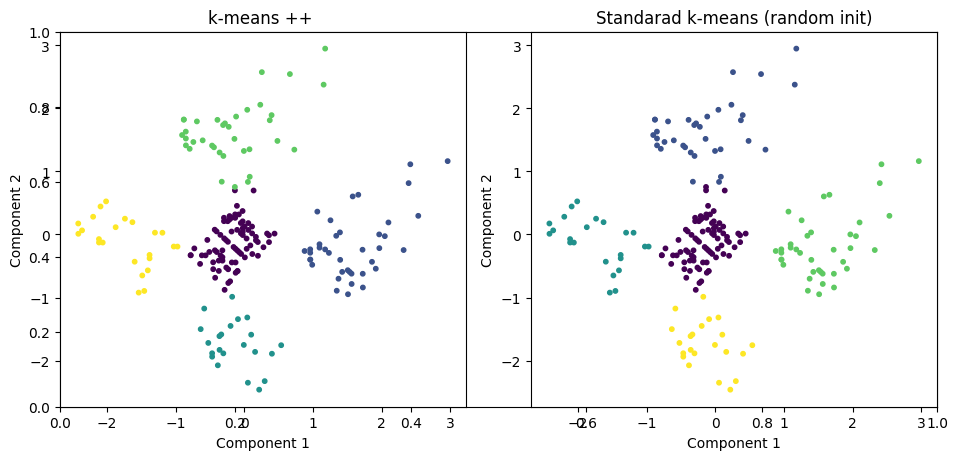

In [ ]:
k=5
kmeans_random=KMeans(n_clusters=k,init='random',n_init=1,random_state=1)
kmeans_random.fit(x_pca_reduced)
kmeans_plus=KMeans(n_clusters=k,init='k-means++',n_init=1,random_state=1)
kmeans_plus.fit(x_pca_reduced)
inertias_random=kmeans_random.inertia_
inertias_plus=kmeans_plus.inertia_
sil_random=silhouette_score(x_pca_reduced,kmeans_random.labels_)
sil_plus=silhouette_score(x_pca_reduced,kmeans_plus.labels_)
print('Standarad k-means (random init):')
print('Inertia:',inertias_random)
print('Silhouette Score:',sil_random)
print('K-means++:')
print('Inertia:',inertias_plus)
print('Silhouette Score:',sil_plus)

fig,ax=plt.subplots(figsize=(10,5))
plt.subplot(1,2,2)
plt.title('Standarad k-means (random init)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.scatter(x_pca_reduced[:, 0], x_pca_reduced[:, 1], c=kmeans_random.labels_, cmap='viridis',s=10)
plt.subplot(1,2,1)
plt.scatter(x_pca_reduced[:, 0], x_pca_reduced[:, 1], c=kmeans_plus.labels_, cmap='viridis',s=10)
plt.title('k-means ++ ')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.tight_layout()
plt.show()

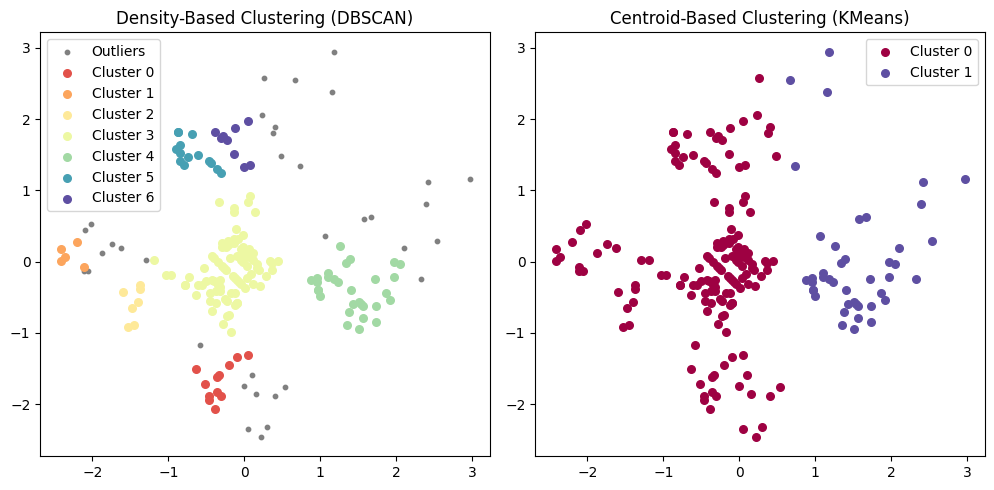

In [ ]:
dbscan=DBSCAN(eps=0.3,min_samples=5)
db_labels=dbscan.fit_predict(x_pca_reduced)

km_model=KMeans(n_clusters=2,random_state=42)
km_labels=km_model.fit_predict(x_pca_reduced)

plt.figure(figsize=(15,5))
plt.subplot(131)

db_unique=np.unique(db_labels)
color_map_db=plt.cm.Spectral(np.linspace(0, 1, len(db_unique)))
for group, shade in zip(db_unique, color_map_db):
  mask = (db_labels == group)
  if group == -1:
        plt.scatter(x_pca_reduced[mask][:, 0], x_pca_reduced[mask][:, 1], color='gray', s=10, label='Outliers')
  else:
        plt.scatter(x_pca_reduced[mask][:, 0], x_pca_reduced[mask][:, 1], color=shade, s=30, label=f'Cluster {group}')

plt.title('Density-Based Clustering (DBSCAN)')
plt.legend()

# KMeans results
plt.subplot(132)
km_unique = np.unique(km_labels)
color_map_km = plt.cm.Spectral(np.linspace(0, 1, len(km_unique)))

for group, shade in zip(km_unique, color_map_km):
    plt.scatter(x_pca_reduced[km_labels == group][:, 0], x_pca_reduced[km_labels == group][:, 1], color=shade, s=30, label=f'Cluster {group}')

plt.title('Centroid-Based Clustering (KMeans)')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:

from sklearn.model_selection import GridSearchCV
import numpy as np


def silhouette_scorer(estimator, x_pca_m):
    labels = estimator.fit_predict(x_pca_m)
    if len(set(labels)) > 1 and -1 not in set(labels):
        return silhouette_score(x_pca_m, labels)
    else:
        return -1
eps_value_=np.arange(0.1,2.0,0.1)

min_samples_value=np.arange(2,15)
param_grid = {'eps': eps_value_,
              'min_samples': min_samples_value
}
grid_search = GridSearchCV(
    estimator=DBSCAN(),
    param_grid=param_grid,
    scoring=silhouette_scorer,
    cv=5,
    n_jobs=1
)

grid_search.fit(x_scaled_m)

print("Best parameters found: ", grid_search.best_params_)
#هذا يا راما لسا مش زابط عي انتي كتبيي واحد ف لااعملي سكيب عنه

In [ ]:
inertia=[]
h_range=range(2,21)
for k in h_range:
  kmeans=KMeans(n_clusters=k,random_state=42)
  kmeans.fit(x_pca_reduced)
  inertia.append(kmeans.inertia_)
plt.figure(figsize=(8, 5))
plt.plot(h_range,inertia,marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()